# Guided Project:
### Investigating Airplane Accidents

## Introduction

Accidents are an unfortunate fact of air travel. Although flying is statistically safer than driving, minor and major flying accidents occur daily. In this project, we'll work with a data set of airplane accident statistics to analyze patterns and look for any common threads.<br>

We'll be working with a data set that contains 77,282 aviation accidents that occurred in the U.S., and the metadata associated with them. The data in our `AviationData.txt` file comes from the [National Transportation Safety Board (NTSB)](http://www.ntsb.gov/Pages/default.aspx). You can download the file at [data.gov](http://catalog.data.gov/dataset/aviation-data-and-documentation-from-the-ntsb-accident-database-system-05748/resource/4b1e95fe-91a7-4112-85fa-424d2672a906). Here's a preview:


```
Event Id | Investigation Type | Accident Number | Event Date | Location | Country | Latitude | Longitude | Airport Code | Airport Name | Injury Severity | Aircraft Damage | Aircraft Category | Registration Number | Make | Model | Amateur Built | Number of Engines | Engine Type | FAR Description | Schedule | Purpose of Flight | Air Carrier | Total Fatal Injuries | Total Serious Injuries | Total Minor Injuries | Total Uninjured | Weather Condition | Broad Phase of Flight | Report Status | Publication Date |
20150908X74637 | Accident | CEN15LA402 | 09/08/2015 | Freeport, IL | United States | 42.246111 | -89.581945 | KFEP | albertus Airport | Non-Fatal | Substantial | Unknown | N24TL | CLARKE REGINALD W | DRAGONFLY MK |  |  |  | Part 91: General Aviation |  | Personal |  |  | 1 |  |  | VMC | TAKEOFF | Preliminary | 09/09/2015 |
20150906X32704 | Accident | ERA15LA339 | 09/05/2015 | Laconia, NH | United States | 43.606389 | -71.452778 | LCI | Laconia Municipal Airport | Fatal(1) | Substantial | Weight-Shift | N2264X | EVOLUTION AIRCRAFT INC | REVO | No | 1 | Reciprocating | Part 91: General Aviation |  | Personal |  | 1 |  |  |  | VMC | MANEUVERING | Preliminary | 09/10/2015 |
20150908X00229 | Accident | GAA15CA251 | 09/04/2015 | Hayes, SD | United States |  |  |  |  |  |  |  | N321DA | AIR TRACTOR INC | AT 402A |  |  |  |  |  |  |  |  |  |  |  |  |  | Preliminary |  |
```

As we can see, the file isn't in CSV format; it separates the fields with a pipe character (`|`) instead. In the following exercise, you'll need to do some custom parsing to read in `AviationData.txt`. Each row contains data about a single aviation accident. Here are descriptions for some of the columns:

* Event Id - The unique id for the incident
* Investigation Type - The type of investigation the NTSB conducted
* Event Date - The date of the accident
* Location - Where the accident occurred
* Country - The country where the accident occurred
* Latitude - The latitude where the accident occurred
* Longitude - The longitude where the accident occurred
* Injury Severity - The severity of any injuries
* Aircraft Damage - The extent of the damage to the aircraft
* Aircraft Category - The type of aircraft
* Make - The make of the aircraft
* Model - The model of the aircraft
* Number of Engines - The number of engines on the plane
* Air Carrier - The carrier operating the aircraft
* Total Fatal Injuries - The number of fatal injuries
* Total Serious Injuries - The number of serious injuries
* Total Minor Injuries - The number of minor injuries
* Total Uninjured - The number of people who did not sustain injuries
* Broad Phase of Flight - The phase of flight during which the accident occurred

In [5]:
import pandas as pd
import csv

In [2]:
# read txt file using pandas.read_csv
aviation = pd.read_csv('AviationData.txt', sep='|')

In [4]:
aviation.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,Publication Date,
0,20150908X74637,Accident,CEN15LA402,09/08/2015,"Freeport, IL",United States,42.246111,-89.581945,KFEP,albertus Airport,...,,,1,,,VMC,TAKEOFF,Preliminary,09/09/2015,
1,20150906X32704,Accident,ERA15LA339,09/05/2015,"Laconia, NH",United States,43.606389,-71.452778,LCI,Laconia Municipal Airport,...,,1,,,,VMC,MANEUVERING,Preliminary,09/10/2015,
2,20150908X00229,Accident,GAA15CA251,09/04/2015,"Hayes, SD",United States,,,,,...,,,,,,,,Preliminary,,
3,20150903X33216,Accident,WPR15FA256,09/03/2015,"Santee, CA",United States,32.829445,-116.988611,SEE,GILLESPIE FIELD,...,,2,,,,VMC,TAKEOFF,Preliminary,09/09/2015,
4,20150903X34535,Accident,ERA15LA338,09/03/2015,"Cresskill, NJ",United States,40.935833,-73.958611,,N/A,...,,,2,,,VMC,,Preliminary,09/10/2015,


* Use the `head` and `tail` commands to explore AviationData.txt on the command line.
```
$ head 'AviationData.txt'
...
$ tail 'AviationData.txt'
...
```

* Open the empty Python script read.py.
* In read.py, open AviationData.txt and read each line into a list.
  * When you're finished, you should have a list of strings, each of which represents one line from AviationData.txt.
  * Assign the result to aviation_data.
* Loop through each item in aviation_data and split it on the pipe character (`|`).
  * After the loop completes, you should have a list of lists. Each inner list should be a single row.
  * Assign the result to aviation_list.
* Create a list named lax_code.
* Search through aviation_list for LAX94LA336. This value could be in any column and in any row.
  * When you find the value, append the entire row to lax_code.
* Were there any downsides to the approach you just took to search through AviationData.txt? Write some text explaining your answer.

In [223]:
# read txt file using csv module

f = open('AviationData.txt', 'r', encoding='utf-8')
reader = csv.reader(f)

aviation_data = []
for line in reader:
    aviation_data.append(line)

In [224]:
unique = {}
for i, avd in enumerate(aviation_data):
    if len(avd) not in unique:
        unique[len(avd)] = 0
    else:
        unique[len(avd)] += 1

In [225]:
unique

{1: 525, 2: 73949, 3: 2527, 4: 251, 5: 22, 6: 2}

### txt data includes comma(` , `)
* Replace commas with `-` and read again.

In [304]:
f2 = open('AviationData.txt', 'rt', encoding='utf-8')
reader2 = csv.reader(f2, skipinitialspace=True)

aviation_data = []
for line in reader2:
    
    summed = ''
    for l in line:
        summed += l.replace(',', '')
        summed += '-'
    
    aviation_data.append([summed])

In [305]:
unique = {}
for i, avd in enumerate(aviation_data):
    if len(avd) not in unique:
        unique[len(avd)] = 0
    else:
        unique[len(avd)] += 1

In [306]:
unique

{1: 77281}

In [307]:
aviation_list = []
for i, av in enumerate(aviation_data):
    #print(i)
    if i != 0:
        split = av[0].split(' | ')
        aviation_list.append(split[:-1])
    
    else:
        aviation_list.append(av[0].split(' | ')[:-1])

In [309]:
lax_code = []

for avl in aviation_list:
    for avl_component in avl:
        if avl_component == 'LAX94LA336':
            lax_code.append(avl)

lax_code

[['20001218X45447',
  'Accident',
  'LAX94LA336',
  '07/19/1962',
  'BRIDGEPORT-CA',
  'United States',
  '',
  '',
  '',
  '',
  'Fatal(4)',
  'Destroyed',
  '',
  'N5069P',
  'PIPER',
  'PA24-180',
  'No',
  '1',
  'Reciprocating',
  '',
  '',
  'Personal',
  '',
  '4',
  '0',
  '0',
  '0',
  'UNK',
  'UNKNOWN',
  'Probable Cause',
  '09/19/1996']]

### Note.
Downsides to the approach to search through `AviationData.txt`
* Algorithm time efficiency : `O(n^2)` - exponential time
* There must be a better way to perform the same searching.

## Linear and Log Time Algorithms

The algorithm you wrote on the previous screen took exponential time. That's because it had to loop through each row first, and then each column inside that row.<br>

There are ways to make the algorithm take linear and constant time while we still scan across the whole data set, though.

* Write a linear time algorithm that searches each row in `aviation_data` for the string `LAX94LA336`.
* Try writing a `log(n)` time algorithm that searches `AviationData.txt` for the string `LAX94LA336`.
* What are the trade-offs between the different approaches? Write some text explaining your answer.

In [310]:
# O(n) algorithm

#' '.join(aviation_list[0])

lax_code = []
for i in range(len(aviation_list)):
    row = aviation_list[i]
    if row[2] == 'LAX94LA336':
        lax_code.append(row)

In [311]:
lax_code

[['20001218X45447',
  'Accident',
  'LAX94LA336',
  '07/19/1962',
  'BRIDGEPORT-CA',
  'United States',
  '',
  '',
  '',
  '',
  'Fatal(4)',
  'Destroyed',
  '',
  'N5069P',
  'PIPER',
  'PA24-180',
  'No',
  '1',
  'Reciprocating',
  '',
  '',
  'Personal',
  '',
  '4',
  '0',
  '0',
  '0',
  'UNK',
  'UNKNOWN',
  'Probable Cause',
  '09/19/1996']]

In [312]:
# O(log(n)) algorithm

In [313]:
lax_code = []
for i in range(len(aviation_list)):
    row = aviation_list[i]
    print(row[2])
    
    if i == 10:
        break

Accident Number
CEN15LA402
ERA15LA339
GAA15CA251
WPR15FA256
ERA15LA338
ERA15FA336
ERA15FA335
WPR15LA255
GAA15CA244
CEN15LA392


### `Accident Number` column format analysis
Analysis example : `CEN15LA402`
* `CEN` : Codename
* `15` : Year of `CEN`, **sorting standard 1(descending)**
* `LA` : Areaname of `CEN15`
* `402` : Casenum of `CEN15LA`, **sorting standard 2(descending)**

### Approach strategy
1. Loop through `Accident Number` until we find `Year` string equal to `94`
2. increment the index by +1 or -1 until we find `LAX94LA336`
   * increment ++1 : searching terminates when `Year` part == `93`
   * increment --1 : searching terminates when `Year` part == `95`

In [314]:
import math

def format_year(string):
    return string[3:5]

upper_bound = len(aviation_list) - 1
lower_bound = 0

target = 'LAX94LA336'
guess_index = math.floor((upper_bound + lower_bound)/2)

target_year = format_year(target)
year = format_year(aviation_list[guess_index][2])

# check the direction from where to approach the target
# this value will be referenced for 2nd loop
# small num -> big num : 1
# big num -> small num : 0
direction = 0
if target_year > year:
    direction = 1

# first while loop
while (year != target_year) and (upper_bound >= lower_bound):
    
    if year > target_year:
        lower_bound += 1
    else:
        upper_bound -= 1
        
    guess_index = math.floor((upper_bound + lower_bound)/2)
    year = format_year(aviation_list[guess_index][2])
    
# check the result from the first loop
if year == target_year:
    print('found')
    print(guess_index)
else:
    print('-1')

found
41128


In [315]:
direction

0

In [316]:
aviation_list[41128][2]

'FTW94LA320'

In [352]:
# second while loop

acc = aviation_list[guess_index][2]

if direction:
    step = 1
else:
    step = -1

while (year == '94') and (acc != target):
    guess_index += step
    acc = aviation_list[guess_index][2]
    
# check the result from second loop
if acc == target:
    print('found')
    print(aviation_list[guess_index])
else:
    print(-1)

found
['20001218X45447', 'Accident', 'LAX94LA336', '07/19/1962', 'BRIDGEPORT-CA', 'United States', '', '', '', '', 'Fatal(4)', 'Destroyed', '', 'N5069P', 'PIPER', 'PA24-180', 'No', '1', 'Reciprocating', '', '', 'Personal', '', '4', '0', '0', '0', 'UNK', 'UNKNOWN', 'Probable Cause', '09/19/1996']


In [318]:
aviation_list[-5]

['20001218X45447',
 'Accident',
 'LAX94LA336',
 '07/19/1962',
 'BRIDGEPORT-CA',
 'United States',
 '',
 '',
 '',
 '',
 'Fatal(4)',
 'Destroyed',
 '',
 'N5069P',
 'PIPER',
 'PA24-180',
 'No',
 '1',
 'Reciprocating',
 '',
 '',
 'Personal',
 '',
 '4',
 '0',
 '0',
 '0',
 'UNK',
 'UNKNOWN',
 'Probable Cause',
 '09/19/1996']

### Note.
**Trade-offs between the different approaches**
* It requires more time to code the algorithm to meet better time efficiency.

## Hash Tables

So far, you've stored the data as a list of strings and a list of lists. You can also store the data as a list of dictionaries.

* Create an empty list and name it `aviation_dict_list`.
* Loop through each item in `aviation_data` and split it on the pipe character (`|`).
  * Convert the split row to a dictionary. The dictionary should use the columns names as keys, and their values as its own values. Here's an example of a single item:
```python
{"Event Id": "20150908X74637", "Investigation Type": "Accident", ...}
```
  * Append the result to `aviation_dict_list`.
  * Create an empty list and name it `lax_dict`.
  * Search through `aviation_dict_list` for `LAX94LA336`. This value could be in any key in any dictionary.
  * When you find the value, append the entire dictionary to `lax_dict`.
  * Was it harder or easier to search through a list of dictionaries than a list of lists? Write your thoughts in a text file.

In [319]:
aviation_dict_list = []
colnames = []

for i, av_line in enumerate(aviation_list):
    split = av_line
    if i != 0:
        row_dict = {k:v for (k,v) in zip(colnames, split)}
        aviation_dict_list.append(row_dict)
        
    else:
        colnames = av_line
        
aviation_dict_list[0]

{'Accident Number': 'CEN15LA402',
 'Air Carrier': '',
 'Aircraft Category': 'Unknown',
 'Aircraft Damage': 'Substantial',
 'Airport Code': 'KFEP',
 'Airport Name': 'albertus Airport',
 'Amateur Built': '',
 'Broad Phase of Flight': 'TAKEOFF',
 'Country': 'United States',
 'Engine Type': '',
 'Event Date': '09/08/2015',
 'Event Id': '20150908X74637',
 'FAR Description': 'Part 91: General Aviation',
 'Injury Severity': 'Non-Fatal',
 'Investigation Type': 'Accident',
 'Latitude': '42.246111',
 'Location': 'Freeport-IL',
 'Longitude': '-89.581945',
 'Make': 'CLARKE REGINALD W',
 'Model': 'DRAGONFLY MK',
 'Number of Engines': '',
 'Publication Date': '09/09/2015',
 'Purpose of Flight': 'Personal',
 'Registration Number': 'N24TL',
 'Report Status': 'Preliminary',
 'Schedule': '',
 'Total Fatal Injuries': '',
 'Total Minor Injuries': '',
 'Total Serious Injuries': '1',
 'Total Uninjured': '',
 'Weather Condition': 'VMC'}

In [320]:
lax_dict = []

for av_dict in aviation_dict_list:
    
    if av_dict['Accident Number'] == 'LAX94LA336':
        lax_dict.append(av_dict)

In [321]:
lax_dict

[{'Accident Number': 'LAX94LA336',
  'Air Carrier': '',
  'Aircraft Category': '',
  'Aircraft Damage': 'Destroyed',
  'Airport Code': '',
  'Airport Name': '',
  'Amateur Built': 'No',
  'Broad Phase of Flight': 'UNKNOWN',
  'Country': 'United States',
  'Engine Type': 'Reciprocating',
  'Event Date': '07/19/1962',
  'Event Id': '20001218X45447',
  'FAR Description': '',
  'Injury Severity': 'Fatal(4)',
  'Investigation Type': 'Accident',
  'Latitude': '',
  'Location': 'BRIDGEPORT-CA',
  'Longitude': '',
  'Make': 'PIPER',
  'Model': 'PA24-180',
  'Number of Engines': '1',
  'Publication Date': '09/19/1996',
  'Purpose of Flight': 'Personal',
  'Registration Number': 'N5069P',
  'Report Status': 'Probable Cause',
  'Schedule': '',
  'Total Fatal Injuries': '4',
  'Total Minor Injuries': '0',
  'Total Serious Injuries': '0',
  'Total Uninjured': '0',
  'Weather Condition': 'UNK'}]

### Note.
Was it harder or easier to search through a list of dictionaries than a list of lists?

* **Easy**. Because we can access certain value in more direct way than accessing to a list of lists.
* **However,** there occur a trade-off. Dictionary type data structure requires more RAM capacity.

## Accidents by U.S. State

You now have two representations of the data - `aviation_dict_list` and `aviation_list`. In the analysis on the next few screens, feel free to choose the representation that makes the analysis the easiest.<br>

On this screen, you'll count how many accidents occurred in each U.S. state, then determine which state had the most accidents overall.

In [348]:
aviation_list[1][4]

'Freeport-IL'

In [335]:
def concat_state(string):
    return string.split('-')[1].upper()

concat_state(aviation_list[1][4])

'IL'

In [338]:
# count accidents using aviation_list

count_accidents = {}

for i, avl in enumerate(aviation_list[1:]):
    
    if avl[5] ==  'United States':
        try:
            state = concat_state(avl[4])
        except:
            state = 'None'

        if state in count_accidents:
            count_accidents[state] += 1
        else:
            count_accidents[state] = 1


In [345]:
count_accidents_sorted = [(k, v) for (k,v) in count_accidents.items()]
count_accidents_sorted.sort(key=lambda x: x[1], reverse=True)

In [347]:
count_accidents_sorted[:5]

[('CA', 8028), ('TX', 5109), ('FL', 5093), ('AK', 5048), ('AZ', 2501)]

## Fatalities and Injuries by Month

You can also count how many fatalities and serious injuries occurred during each month.

* Count how many fatalities and serious injuries occured during each unique month and year, and assign the result to `monthly_injuries`.
  * You can parse the date by splitting the `Event Date` column and extracting the month number.
  * Total the fatalities and serious injuries by adding the numbers in the `Total Fatal Injuries` and `Total Serious Injuries` columns.
  * These columns are blank for months with no fatalities or serious injuries, so you'll have to replace those empty slots with `0`.
* Turn `monthly_injuries` into two lists - one with the month names, and one with the counts.
* Implement a clever way of displaying these lists so you can understand the number of fatalities and serious injuries per month.

In [360]:
event_date_index = aviation_list[0].index('Event Date')
total_fatal_injuries_index = aviation_list[0].index('Total Fatal Injuries')
total_serious_injuries_index = aviation_list[0].index('Total Serious Injuries')

print(event_date_index, total_fatal_injuries_index, total_serious_injuries_index)

3 23 24


In [361]:
aviation_list[1][event_date_index]

'09/08/2015'

In [355]:
def year_and_month(string):
    split = string.split('/')
    year = split[2]
    month = split[0]
    
    return year, month

In [362]:
y, m = year_and_month(aviation_list[1][event_date_index])
print(y)
print(m)

2015
09


### There are some rows with no value in 'Event Date' column

In [390]:
aviation_list[-1][3]

''

* We can infer the year/month from the first column

In [392]:
aviation_list[-1][0]

'20150729X33718'

In [400]:
count_injuries = {}

for avl in aviation_list[1:]:
    
    try:
        year, month = year_and_month(avl[event_date_index])
    except:
        year = avl[0][:4]
        month = avl[0][4:6]
    
    #print(year, month)
    
    tot_fatal = avl[total_fatal_injuries_index]
    tot_serious = avl[total_serious_injuries_index]
    
    injuries = 0
    try:
        injuries += int(tot_fatal)
    except:
        pass
    
    try:
        injuries += int(tot_serious)
    except:
        pass
    
    # put the data into dictionary
    
    if year in count_injuries:
        count_injuries[year][month] += injuries
    
    else:
        months = ['01', '02', '03', '04', '05', '06',
                 '07', '08', '09', '10', '11', '12']
        count_injuries[year] = {i:0 for i in months}
        count_injuries[year][month] += injuries

In [403]:
count_injuries['2015']['08']

114

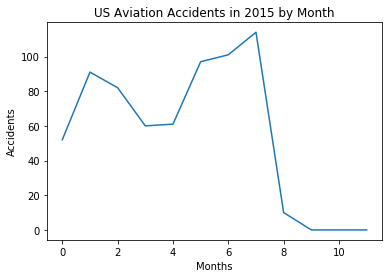

In [413]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('US Aviation Accidents in 2015 by Month')
plt.xlabel('Months')
plt.ylabel('Accidents')
plt.plot(range(12), count_injuries['2015'].values());plt.show()

In [410]:
count_injuries.keys()

dict_keys(['2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986', '1985', '1984', '1983', '1982', '1981', '1979', '1977', '1974', '1962', '1948'])

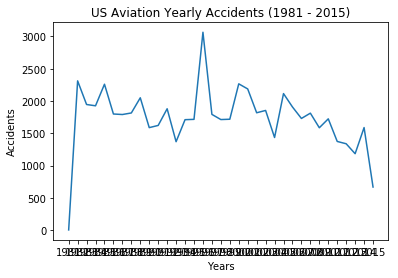

In [419]:
plt.title('US Aviation Yearly Accidents (1981 - 2015)')
plt.xlabel('Years')
plt.ylabel('Accidents')

year = [str(i) for i in range(1981, 2016)]
year_acc = [sum(count_injuries[y].values())\
           for y in year]

plt.plot(year, year_acc);plt.show()